In [1]:
import os
import pickle
import numpy as np
import torch
import librosa
import re
from regCAV import RegCAV
from fs_lmdb import LMDBFootstepDataset

/home/jed/miniconda3/envs/SemanticFader/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
db_path = 'footsteps_full-hfclap'

✓ Loaded 2401 samples for attribute 'grass'
Grass range: 0.00 to 1.00
Grass distribution:
  grass=0.00: 343 samples
  grass=0.17: 343 samples
  grass=0.33: 343 samples
  grass=0.50: 343 samples
  grass=0.67: 343 samples
  grass=0.83: 343 samples
  grass=1.00: 343 samples
Training set: 1920 samples
Test set: 481 samples
Grass range (train): 0.00 to 1.00
Grass range (test): 0.00 to 1.00
Training linear regression...


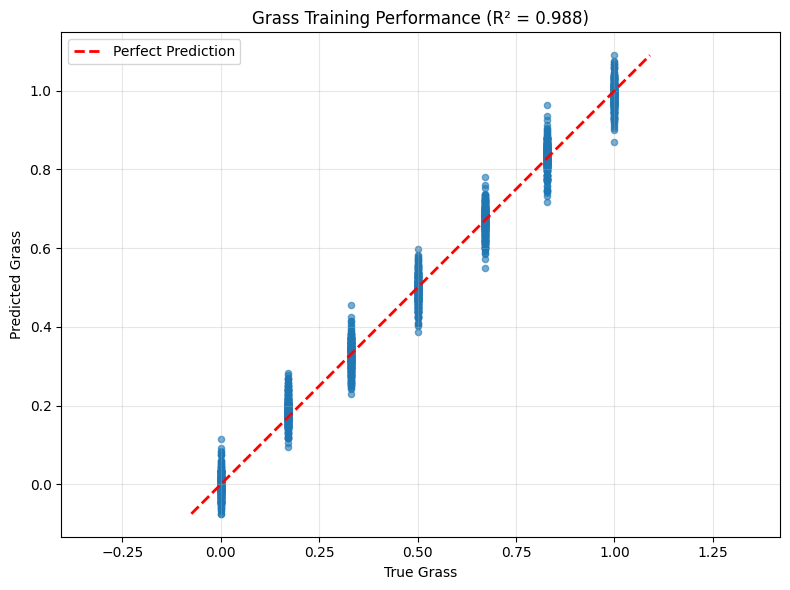

Training R²: 0.988
Test R²: 0.983
Training RMSE: 0.036
Test RMSE: 0.045
RCV shape: (512,)
RCV for 'grass' saved to RCVs/grass_rcv.pkl


In [3]:
##########train on grassiness
regCAV_grass = RegCAV()
embeddings, grassiness = regCAV_grass.load_continuous_data_from_lmdb(db_path, "grass")
regCAV_grass.train_rcv(embeddings, grassiness)
regCAV_grass.save_rcv("RCVs/grass_rcv.pkl")

✓ Loaded 2401 samples for attribute 'speed'
Speed range: 0.20 to 1.00
Speed distribution:
  speed=0.20: 343 samples
  speed=0.33: 343 samples
  speed=0.47: 343 samples
  speed=0.60: 343 samples
  speed=0.73: 343 samples
  speed=0.87: 343 samples
  speed=1.00: 343 samples
Training set: 1920 samples
Test set: 481 samples
Speed range (train): 0.20 to 1.00
Speed range (test): 0.20 to 1.00
Training linear regression...


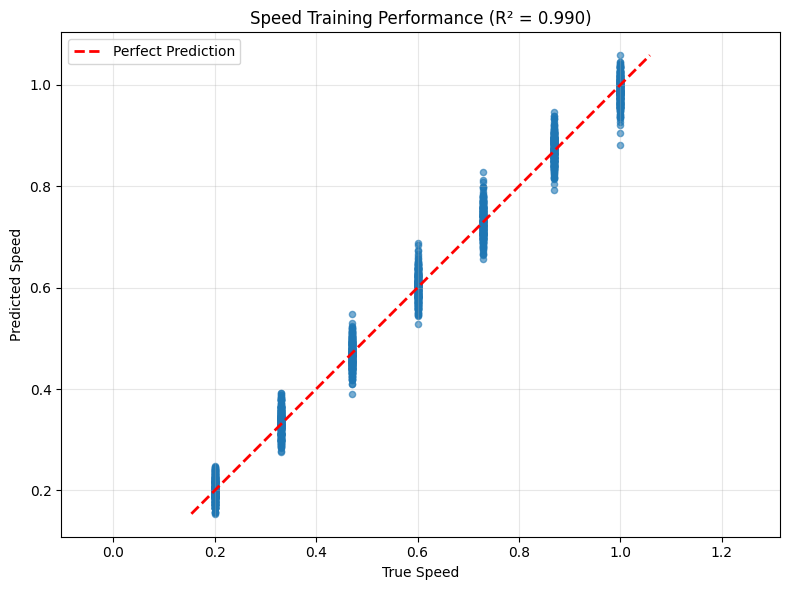

Training R²: 0.990
Test R²: 0.984
Training RMSE: 0.026
Test RMSE: 0.034
RCV shape: (512,)
RCV for 'speed' saved to RCVs/speed_rcv.pkl


In [4]:
##########train on speed
regCAV_speed = RegCAV()
embeddings, speed = regCAV_speed.load_continuous_data_from_lmdb(db_path, "speed")
regCAV_speed.train_rcv(embeddings, speed)
regCAV_speed.save_rcv("RCVs/speed_rcv.pkl")